<a href="https://colab.research.google.com/github/Brayan0928/Amigo-Secreto/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



💰 Facturación total: $4,638,316,200.00

📦 Facturación por categoría de producto:
Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: Facturacion, dtype: float64 

👨‍💼 Facturación por vendedor (Top 10):
Vendedor
Felipe Santos      372652300.0
Izabela de León    368964800.0
Maria Alfonso      368282900.0
Juliana Costa      356385400.0
Pedro Gomez        330020800.0
Rafael Acosta      326829100.0
Juan Fernandez     324965300.0
Lucas Olivera      321683700.0
Camila Rivera      319351500.0
Beatriz Morales    318885100.0
Name: Facturacion, dtype: float64 

📍 Facturación por lugar de compra:
Lugar de Compra
Bogotá           1.911588e+09
Medellín         1.155172e+09
Cali             5.334400e+08
Perei

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


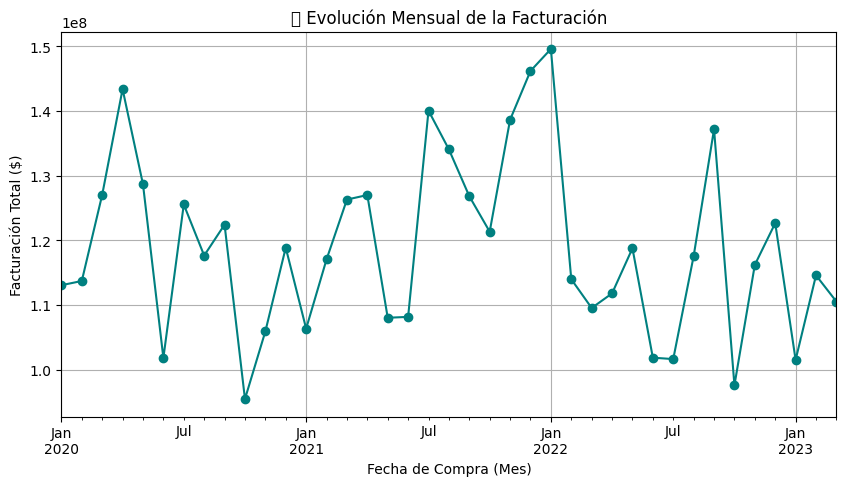

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# === CARGA DE DATOS ===
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar y unir bases
tienda = pd.concat([
    pd.read_csv(url1),
    pd.read_csv(url2),
    pd.read_csv(url3),
    pd.read_csv(url4)
], ignore_index=True)

# === PROCESAMIENTO ===
# Crear columna de facturación
tienda['Facturacion'] = tienda['Precio'] + tienda['Costo de envío']

# Convertir fecha
tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)

# === ANÁLISIS DE FACTURACIÓN ===
facturacion_total = tienda['Facturacion'].sum()
print(f"💰 Facturación total: ${facturacion_total:,.2f}\n")

print("📦 Facturación por categoría de producto:")
print(tienda.groupby('Categoría del Producto')['Facturacion'].sum().sort_values(ascending=False), "\n")

print("👨‍💼 Facturación por vendedor (Top 10):")
print(tienda.groupby('Vendedor')['Facturacion'].sum().sort_values(ascending=False).head(10), "\n")

print("📍 Facturación por lugar de compra:")
print(tienda.groupby('Lugar de Compra')['Facturacion'].sum().sort_values(ascending=False), "\n")

print("💳 Facturación por método de pago:")
print(tienda.groupby('Método de pago')['Facturacion'].sum().sort_values(ascending=False), "\n")

# === FACTURACIÓN MENSUAL ===
facturacion_mensual = tienda.groupby(tienda['Fecha de Compra'].dt.to_period('M'))['Facturacion'].sum()

# === GRAFICAR ===
plt.figure(figsize=(10,5))
facturacion_mensual.plot(kind='line', marker='o', color='teal')
plt.title('📈 Evolución Mensual de la Facturación')
plt.xlabel('Fecha de Compra (Mes)')
plt.ylabel('Facturación Total ($)')
plt.grid(True)
plt.show()


# 2. Ventas por categoría

📊 Ventas por categoría de producto:

Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: Facturacion, dtype: float64


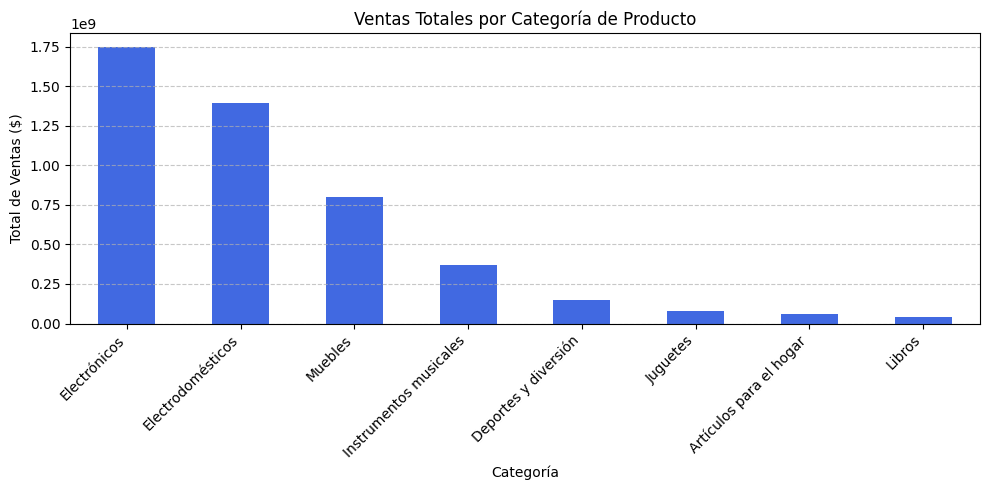

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# === CARGA DE DATOS ===
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Unir todas las bases en un solo DataFrame
tienda = pd.concat([
    pd.read_csv(url1),
    pd.read_csv(url2),
    pd.read_csv(url3),
    pd.read_csv(url4)
], ignore_index=True)

# === PROCESAMIENTO ===
# Crear columna de facturación por venta
tienda['Facturacion'] = tienda['Precio'] + tienda['Costo de envío']

# === ANÁLISIS DE VENTAS POR CATEGORÍA ===
ventas_categoria = tienda.groupby('Categoría del Producto')['Facturacion'].sum().sort_values(ascending=False)

print("📊 Ventas por categoría de producto:\n")
print(ventas_categoria)

# === GRAFICAR ===
plt.figure(figsize=(10,5))
ventas_categoria.plot(kind='bar', color='royalblue')
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Total de Ventas ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


⭐ Calificación promedio general de la tienda: 4.01

📊 Calificación promedio por categoría de producto:

Categoría del Producto
Juguetes                   4.070543
Muebles                    4.033934
Electrodomésticos          4.014795
Libros                     4.004043
Instrumentos musicales     4.003984
Electrónicos               3.992664
Deportes y diversión       3.988320
Artículos para el hogar    3.979452
Name: Calificación, dtype: float64


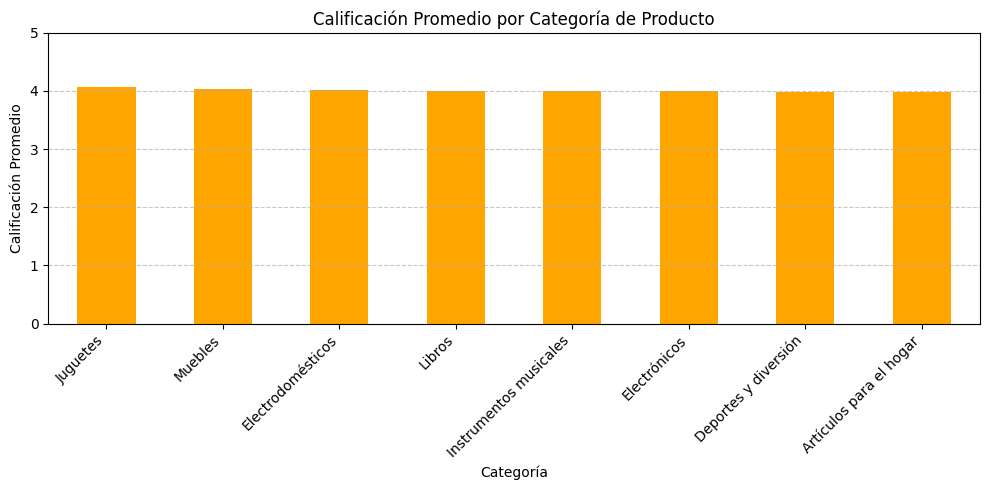

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# === CARGA DE DATOS ===
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# === UNIR BASES ===
tienda = pd.concat([
    pd.read_csv(url1),
    pd.read_csv(url2),
    pd.read_csv(url3),
    pd.read_csv(url4)
], ignore_index=True)

# === CALIFICACIÓN PROMEDIO ===
calificacion_promedio = tienda['Calificación'].mean()
print(f"⭐ Calificación promedio general de la tienda: {calificacion_promedio:.2f}\n")

# === CALIFICACIÓN PROMEDIO POR CATEGORÍA ===
calificacion_categoria = tienda.groupby('Categoría del Producto')['Calificación'].mean().sort_values(ascending=False)
print("📊 Calificación promedio por categoría de producto:\n")
print(calificacion_categoria)

# === GRAFICAR ===
plt.figure(figsize=(10,5))
calificacion_categoria.plot(kind='bar', color='orange')
plt.title('Calificación Promedio por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45, ha='right')
plt.ylim(0,5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# === CARGA DE DATOS ===
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# === UNIR BASES ===
tienda = pd.concat([
    pd.read_csv(url1),
    pd.read_csv(url2),
    pd.read_csv(url3),
    pd.read_csv(url4)
], ignore_index=True)

# === ANÁLISIS DE PRODUCTOS VENDIDOS ===
# Contar cuántas veces se vendió cada producto
ventas_productos = tienda['Producto'].value_counts()

# Mostrar los más vendidos (Top 10)
print("🔥 Productos más vendidos:")
print(ventas_productos.head(10), "\n")

# Mostrar los menos vendidos (Bottom 10)
print("🧊 Productos menos vendido")


🔥 Productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64 

🧊 Productos menos vendido


# 5. Envío promedio por tienda

📦 Costo de envío promedio de la tienda: $24875.15

🚚 Costo de envío promedio por categoría de producto:

Categoría del Producto
Electrodomésticos          61267.449956
Electrónicos               49922.178330
Instrumentos musicales     24574.103586
Muebles                    21447.720042
Deportes y diversión        6910.691824
Artículos para el hogar     4261.780822
Juguetes                    3117.286822
Libros                      2776.145553
Name: Costo de envío, dtype: float64


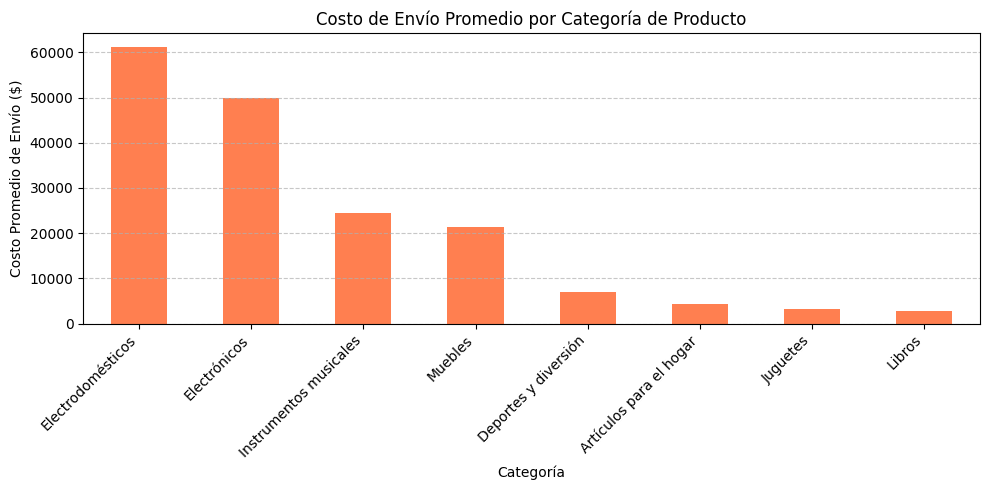

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# === CARGA DE DATOS ===
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# === UNIR BASES ===
tienda = pd.concat([
    pd.read_csv(url1),
    pd.read_csv(url2),
    pd.read_csv(url3),
    pd.read_csv(url4)
], ignore_index=True)

# === ENVÍO PROMEDIO GENERAL ===
envio_promedio = tienda['Costo de envío'].mean()
print(f"📦 Costo de envío promedio de la tienda: ${envio_promedio:.2f}\n")

# === ENVÍO PROMEDIO POR CATEGORÍA ===
envio_categoria = tienda.groupby('Categoría del Producto')['Costo de envío'].mean().sort_values(ascending=False)
print("🚚 Costo de envío promedio por categoría de producto:\n")
print(envio_categoria)

# === GRAFICAR ===
plt.figure(figsize=(10,5))
envio_categoria.plot(kind='bar', color='coral')
plt.title('Costo de Envío Promedio por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Costo Promedio de Envío ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
